<img src="images/cloud.png" width=50% hight=50%>

<center><h1>Text Classification and Sentence Generator</h1></center>

<center><h3>----Validating and Tweaking RNN</h3></center>

## Abstract
As our title, our project is divided into two parts. The first part for our project is to compare recurrent neural network and other algorithms to classify the comments whether it is a good comment or not to validate whether RNN is suitable for text area. The second part is to use recurrent neural network make a sentence generator. It will generate relevant comments based on the values entered. This part is tweaking RNN and applying it in a novel way. The algorithms we used in the project are RNN(recurrent neural network), logistic regression, SVM(support vector machine), Random Forest Classifier, XGBoost Classifier, LSTM(Long Short Term Memory), GRU(Gated Recurrent Unit), and word embedding. Through the comparison, we find the RNN has the highest accuracy in text classification. It has about 84.3% accuracy. So RNN does a better job in text classification than other algorithms. In the sentence generator part, the best model structure is one GRU layer and its parameter is 512 and its accuracy is 18.99%. When we use low creativity, the generated word will be the highest appear frequency in the model. However, when we use the higher creativity, the generated word will be diverse.

## Methods

Algorithms used.

* For Part A:
    * RNN(recurrent neural network)
    * Logistic Regression
    * Support Vector Machine(SVM)
    * Bagging Algo : Random Forest Classifier
    * Boosting Algo : XGBoost Classifier
    * Word Embedding
    
* For Part B:
    * RNN(recurrent neural network)
    * Word Embedding
    * LSTM(Long Short Term Memory)
    * GRU(Gated Recurrent Unit)

## Background
Recurrent Neural Networks are the state of the art algorithm for sequential data and among others used by Apples Siri and Googles Voice Search. This is because it is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for Machine Learning problems that involve sequential data. It is one of the algorithms behind the scenes of the amazing achievements of Deep Learning in the past few years.

## Dataset
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all 500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories. The following is the link for the database: https://www.kaggle.com/snap/amazon-fine-food-reviews . What we use to classify is whether the comments are 5 star or not. In addition, what we use to sentence generator are the text of the database. 

Import the packages we will use.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from scipy import sparse

Let's import the dataset by reading csv and fill the null part.

In [3]:
train = pd.read_csv('amazon-fine-food-reviews/Reviews.csv').fillna(' ')

Let's take a look at the data. The dataset has id, prohuctid, userId, profileName, helpfulnessNumerator, helpfulnessDenominator, score, time, summary, and text. What we need are only score and text.Because what we want to classify is whether the socre of text are 5 or not.

In [4]:
train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
train.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

The dataset have 568,454 raws and quantity is enough.

In [6]:
train.shape

(568454, 10)

Check if the data still has a null part.

In [7]:
train.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

As we said above, we split the data to 5 score part and not 5 score part.

In [8]:
train_text_five = train['Text'][train['Score']==5]
train_text_zero = train['Text'][train['Score']!=5]

Print the amount of the data and we find the data is not balance.

In [9]:
train_text_zero.shape

(205332,)

In [10]:
train_text_five.shape

(363122,)

We simply cut the data into several parts. We have 120,000 traning data, 40,000 validation data and 40,000 test data.

In [11]:
train_text1=train_text_zero[:120000]
train_text2=train_text_five[:120000]
valid_text1=train_text_zero[120000:160000]
valid_text2=train_text_five[120000:160000]
test_text1=train_text_zero[160000:200000]
test_text2=train_text_five[160000:200000]

We still don't have a label for the data. So we create label for them which 0 is for the text is not 5 and 1 is for the text is 5.

In [12]:
train_label1=pd.Series(np.zeros(120000))
train_label2=pd.Series(np.ones(120000))
valid_label1=pd.Series(np.zeros(40000))
valid_label2=pd.Series(np.ones(40000))
test_label1=pd.Series(np.zeros(40000))
test_label2=pd.Series(np.ones(40000))

Mix the data and label together and now we have the complete data for fitting models.

In [13]:
X_train = pd.concat([train_text1,train_text2])
Y_train=pd.concat([train_label1,train_label2])
X_valid = pd.concat([valid_text1,valid_text2])
Y_valid=pd.concat([valid_label1,valid_label2])
X_test = pd.concat([test_text1,test_text2])
Y_test=pd.concat([test_label1,test_label2])

## Part A

In [11]:
import time

start_time = time.time()

from sklearn.model_selection import train_test_split

import sys, os, re, csv, codecs, numpy as np, pandas as pd

np.random.seed(32)

os.environ["OMP_NUM_THREADS"] = "4"

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM

from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D

from keras.models import Model, load_model

from keras import initializers, regularizers, constraints, optimizers, layers, callbacks

from keras import backend as K

from keras.engine import InputSpec, Layer

Using TensorFlow backend.


A popular and powerful way to associate a vector with a word is the use of dense "word vectors", also called "word embeddings". While the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors (i.e. "dense" vectors, as opposed to sparse vectors). Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or higher (capturing a vocabulary of 20,000 token in this case). So, word embeddings pack more information into far fewer dimensions.

The thought of word embeddings is from the following link, but we don't use the code above it.<br/>
https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/6.1-using-word-embeddings.ipynb

In [15]:
embed_size = 300

# Number of words to consider as features
max_features = 130000

# Cut texts after this number of words 
# (among top max_features most common words)
max_len = 220

#convert them to lowercase
raw_text_train = X_train.str.lower()

raw_text_valid = X_valid.str.lower()

raw_text_test = X_test.str.lower()


tk = Tokenizer(num_words = max_features, lower = True)

tk.fit_on_texts(raw_text_train)

#Change the text to sequences
X_train = tk.texts_to_sequences(raw_text_train)

X_valid = tk.texts_to_sequences(raw_text_valid)

X_test = tk.texts_to_sequences(raw_text_test)


# This turns our lists into a 2D tensor of shape `(samples, maxlen)`
X_train = pad_sequences(X_train, maxlen = max_len)

X_valid = pad_sequences(X_valid, maxlen = max_len)

X_test = pad_sequences(X_test, maxlen = max_len)

Print the shape of each data.

In [16]:
X_valid.shape

(80000, 220)

In [17]:
X_test.shape

(80000, 220)

In [18]:
X_train.shape

(240000, 220)

In [19]:
Y_valid.shape

(80000,)

In [20]:
Y_test.shape

(80000,)

In [21]:
Y_train.shape

(240000,)

### RNN

The Embedding layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors. It takes as input integers, it looks up these integers into an internal dictionary, and it returns the associated vectors. It's effectively a dictionary lookup.

The Embedding layer takes as input a 2D tensor of integers, of shape (samples, sequence_length), where each entry is a sequence of integers. It can embed sequences of variable lengths, so for instance we could feed into our embedding layer above batches that could have shapes (32, 10) (batch of 32 sequences of length 10) or (64, 15) (batch of 64 sequences of length 15). All sequences in a batch must have the same length, though (since we need to pack them into a single tensor), so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated.

This layer returns a 3D floating point tensor, of shape (samples, sequence_length, embedding_dimensionality). Such a 3D tensor can then be processed by a RNN layer or a 1D convolution layer (both will be introduced in the next sections).

When you instantiate an Embedding layer, its weights (its internal dictionary of token vectors) are initially random, just like with any other layer. During training, these word vectors will be gradually adjusted via backpropagation, structuring the space into something that the downstream model can exploit. Once fully trained, your embedding space will show a lot of structure -- a kind of structure specialized for the specific problem you were training your model for.

RNN (Recurrent Neural Networks)：<br/>
Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.

Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist.

<img src="images/RNN-rolled.png" width=20% height=10%>

In the above diagram, a chunk of neural network, AA, looks at some input xtxt and outputs a value htht. A loop allows information to be passed from one step of the network to the next.

These loops make recurrent neural networks seem kind of mysterious. However, if you think a bit more, it turns out that they aren’t all that different than a normal neural network. A recurrent neural network can be thought of as multiple copies of the same network, each passing a message to a successor. Consider what happens if we unroll the loop:

<img src="images/RNN-unrolled.png" width=60% height=30%>

This chain-like nature reveals that recurrent neural networks are intimately related to sequences and lists. They’re the natural architecture of neural network to use for such data.

We use GRU here, and we will introduce GRU in the sentence generator part. You can simply think the GRU is one kind of layer as convolution layer in CNN.

In [100]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
model = Sequential()
model.add(Embedding(130000,32))
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train,Y_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(X_valid, Y_valid))

Train on 240000 samples, validate on 80000 samples
Epoch 1/30
240000/240000 [==============================] - 184s 768us/step - loss: 0.5398 - acc: 0.7375 - val_loss: 0.4992 - val_acc: 0.7643
Epoch 2/30
240000/240000 [==============================] - 183s 762us/step - loss: 0.4643 - acc: 0.7924 - val_loss: 0.4558 - val_acc: 0.7937
Epoch 3/30
240000/240000 [==============================] - 183s 761us/step - loss: 0.4307 - acc: 0.8111 - val_loss: 0.4313 - val_acc: 0.8067
Epoch 4/30
240000/240000 [==============================] - 183s 762us/step - loss: 0.4073 - acc: 0.8241 - val_loss: 0.4156 - val_acc: 0.8161
Epoch 5/30
240000/240000 [==============================] - 183s 762us/step - loss: 0.3865 - acc: 0.8350 - val_loss: 0.4021 - val_acc: 0.8240
Epoch 6/30
240000/240000 [==============================] - 183s 762us/step - loss: 0.3716 - acc: 0.8416 - val_loss: 0.3921 - val_acc: 0.8289
Epoch 7/30
240000/240000 [==============================] - 183s 764us/step - loss: 0.3593 - acc:

Let's evaluate the model, print the test loss and test accuracy. Test loss and test accuracy mean how the model perform in the real world.

In [101]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

80000/80000 [==============================] - 26s 324us/step


In [102]:
test_loss

0.3904477039992809

In [103]:
test_acc

0.8433625

The accuracy is 84.34% and it wil become the criteria for judging whether a model is good or bad in the following part.

Plot the trend of loss and accuracy.

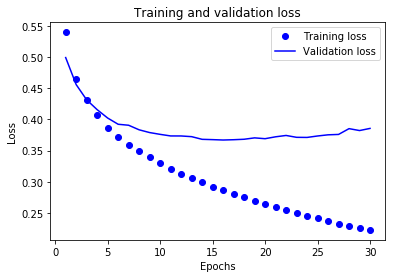

In [104]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

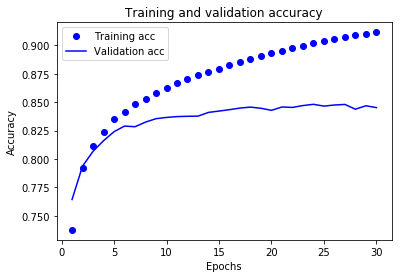

In [105]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Logistic Regression

Tokenizer class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf. By default, all punctuation is removed, turning the texts into space-separated sequences of words (words maybe include the ' character). These sequences are then split into lists of tokens. They will then be indexed or vectorized.

In [95]:
tk = Tokenizer(num_words = 220, lower = True)
tk.fit_on_texts(raw_text_train)
X_train1 = tk.texts_to_matrix(raw_text_train, mode='binary')

X_valid1 = tk.texts_to_matrix(raw_text_valid, mode='binary')

X_test1 = tk.texts_to_matrix(raw_text_test, mode='binary')

The following part, like logistic regression, SVM(support vector machine), Random Forest Classifier, XGBoost Classifier are adapted from the assignment 1. We use the alomost the same code from assignment 1, but change the input data. The following link is assignment 1:<br/>
https://github.com/nikbearbrown/CSYE_7245/blob/master/Assignments/Assignment_1_Properly_Format_and_Explain.ipynb

In [96]:
classifier = LogisticRegression(C=0.1, solver='sag')
classifier.fit(X_train1, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(Y_test,classifier.decision_function(X_test1))
falsepos1,truepos1,thresholds1=roc_curve(Y_valid,classifier.decision_function(X_valid1))

In [99]:
metrics.auc(falsepos1, truepos1)

0.8051642808226744

In [98]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.7991860876158683

As we decided above, we will use the test accuracy as the criteria for judging whether a model is good or bad. We can see the accuracy of logistic regression is about 79.92%. It is lower than RNN.

### SVM

We tried to use SVM to do the classfication, but it ran more than 12 hours and still didn't have a result. So we stop it and just leave the code here.

In [24]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
linKernel = svm.SVC(kernel='linear', C = 2)
linKernel.fit(X_train1, Y_train)

In [ ]:
y_pred=linKernel.predict(X_valid1)
predictions = [round(value) for value in y_pred]
svm_score= accuracy_score(Y_valid,predictions)

In [ ]:
y_pred=linKernel.predict(X_test1)
predictions = [round(value) for value in y_pred]
svm_score= accuracy_score(Y_test,predictions)

### Random Decision Forest

As what we did in assignment 1, first we find the best parameters of the model. Then we use the best parameter to fit model and evaluate the model.

In [26]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

The following is the parameters we want to compare.

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


We find the best parameters and print them.

In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train1,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 61.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4], 'max_depth': [2, 4, 6, 8, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 57, 105, 152, 200]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [24]:
pprint(clf_random.best_params_)

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}


Evalusate the model, print the accuracy of validation and test.

In [27]:
 y_pred=clf_random.predict(X_valid1)
predictions = [round(value) for value in y_pred]
RDF_score= accuracy_score(Y_valid,predictions)
RDF_score

0.8388087007766666

In [28]:
 y_pred=clf_random.predict(X_test1)
predictions = [round(value) for value in y_pred]
RDF_score= accuracy_score(Y_test,predictions)
RDF_score

0.8388526796316331

Not bad, but it is still a little lower than RNN.

### X-Boosting

The same logic as above.

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

List the parameters we want to compare.

In [26]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250]
max_depth = [6, 7, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train1, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


[6, 7, 8]
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 158.2min finished


Best: -0.426484 using {'max_depth': 8, 'n_estimators': 350}
-0.461665 (0.001143) with: {'max_depth': 6, 'n_estimators': 350}
-0.466293 (0.001276) with: {'max_depth': 6, 'n_estimators': 300}
-0.471824 (0.001376) with: {'max_depth': 6, 'n_estimators': 250}
-0.444507 (0.001352) with: {'max_depth': 7, 'n_estimators': 350}
-0.450088 (0.001257) with: {'max_depth': 7, 'n_estimators': 300}
-0.456700 (0.001201) with: {'max_depth': 7, 'n_estimators': 250}
-0.426484 (0.001298) with: {'max_depth': 8, 'n_estimators': 350}
-0.432620 (0.001278) with: {'max_depth': 8, 'n_estimators': 300}
-0.439751 (0.001190) with: {'max_depth': 8, 'n_estimators': 250}


Plot the result of each paramters.

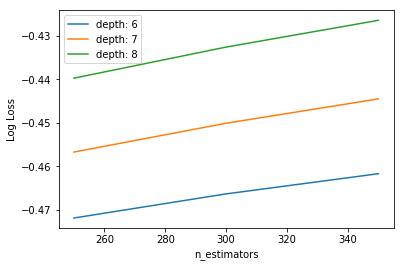

In [27]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

Choose the best parameters and fit model.

In [28]:
xgBoostClassifierModel = XGBClassifier(max_depth=8, n_estimators=350)
xgBoostClassifierModel.fit(X_train1, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
y_pred=xgBoostClassifierModel.predict(X_valid1)
predictions = [round(value) for value in y_pred]
boost_score= accuracy_score(Y_valid,predictions)
boost_score

0.8122366766058879

In [31]:
y_pred=xgBoostClassifierModel.predict(X_test1)
predictions = [round(value) for value in y_pred]
boost_score= accuracy_score(Y_test,predictions)
boost_score

0.8132921691250846

The accuracy of each model list below, we can see that the highest accuracy is 84.34% which is from RNN model. So RNN does better in text area.

<table>
    <tr>
        <td>Algorithm</td>
        <td>Accuracy</td>
        <td>Hyperparameters</td>
    </tr>
    <tr>
        <td>Random Forest Classifier</td>
        <td>83.89%</td>
        <td>'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200</td>
    </tr>
    <tr>
        <td>XGBoost Classifier</td>
        <td>81.33%</td>
        <td>max_depth=8, n_estimators=350</td>
    </tr>
    <tr>
        <td>Logistic Regression</td>
        <td>79.92%</td>
        <td></td>
    </tr>
    <tr>
        <td>RNN(recurrent neural network)</td>
        <td>84.34%</td>
        <td>optimizer='rmsprop', loss='binary_crossentropy', activation='sigmoid', one layer: GRU</td>
    </tr>
</table>

## Part B

This is sentence generator part. First we want to preprocess the data which is the same as above.

The basic code in part B is from Text generation with LSTM
https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/8.1-text-generation-with-lstm.ipynb<br/>
However, I have do a lot change on it.

In [13]:
tk = Tokenizer(num_words = 130000, lower = True)
gen_txt=train_text_five.str.lower()
tk.fit_on_texts(gen_txt)
generate = tk.texts_to_sequences(gen_txt)

In [14]:
word_index = tk.word_index

We have 101,892 comments.

In [15]:
len(word_index)

101892

After cut the data, totally we have 363,122 data.

In [16]:
len(generate)

363122

The shortest of the data is 3.

In [29]:
min([len(i) for i in generate])

3

Next, we will extract partially-overlapping sequences of length maxlen, one-hot encode them and pack them in a 3D Numpy array x of shape (sequences, maxlen, unique_characters).

In [30]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
words = []

# This holds the targets (the follow-up characters)
next_word = []
for n in range(10000):
    if(len(generate[n])>maxlen):
        
        for i in range(0, len(generate[n]) - maxlen, step):
            words.append(generate[n][i: i + maxlen])
            next_word.append(generate[n][i + maxlen])
print('Number of sequences:', len(next_word))

Number of sequences: 90345


In [25]:
X_gen = pad_sequences(words, maxlen = maxlen)

In [26]:
X_gen.shape

(113357, 60)

In [27]:
y = np.zeros((len(words), len(word_index)), dtype=np.bool)
for i, sentence in enumerate(words):
    y[i, next_word[i]] = 1

In [24]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

Before train the model, let me introduce the LSTM and GRU first.

### LSTM
An LSTM has a similar control flow as a recurrent neural network. It processes data passing on information as it propagates forward. The differences are the operations within the LSTM’s cells.

<img src="images/LSTM.png" width=40%>

These operations are used to allow the LSTM to keep or forget information. <br/>
The core concept of LSTM’s are the cell state, and it’s various gates. The cell state act as a transport highway that transfers relative information all the way down the sequence chain. You can think of it as the “memory” of the network. The cell state, in theory, can carry relevant information throughout the processing of the sequence. So even information from the earlier time steps can make it’s way to later time steps, reducing the effects of short-term memory. As the cell state goes on its journey, information get’s added or removed to the cell state via gates. The gates are different neural networks that decide which information is allowed on the cell state. The gates can learn what information is relevant to keep or forget during training.<br/>
Gates contains sigmoid activations. A sigmoid activation is similar to the tanh activation. Instead of squishing values between -1 and 1, it squishes values between 0 and 1. That is helpful to update or forget data because any number getting multiplied by 0 is 0, causing values to disappears or be “forgotten.” Any number multiplied by 1 is the same value therefore that value stay’s the same or is “kept.” The network can learn which data is not important therefore can be forgotten or which data is important to keep.<br/>
Let’s dig a little deeper into what the various gates are doing, shall we? So we have three different gates that regulate information flow in an LSTM cell. A forget gate, input gate, and output gate.<br/>
First, we have the forget gate. This gate decides what information should be thrown away or kept. Information from the previous hidden state and information from the current input is passed through the sigmoid function. Values come out between 0 and 1. The closer to 0 means to forget, and the closer to 1 means to keep.<br/>
To update the cell state, we have the input gate. First, we pass the previous hidden state and current input into a sigmoid function. That decides which values will be updated by transforming the values to be between 0 and 1. 0 means not important, and 1 means important. You also pass the hidden state and current input into the tanh function to squish values between -1 and 1 to help regulate the network. Then you multiply the tanh output with the sigmoid output. The sigmoid output will decide which information is important to keep from the tanh output.<br/>
Now we should have enough information to calculate the cell state. First, the cell state gets pointwise multiplied by the forget vector. This has a possibility of dropping values in the cell state if it gets multiplied by values near 0. Then we take the output from the input gate and do a pointwise addition which updates the cell state to new values that the neural network finds relevant. That gives us our new cell state.<br/>
Last we have the output gate. The output gate decides what the next hidden state should be. Remember that the hidden state contains information on previous inputs. The hidden state is also used for predictions. First, we pass the previous hidden state and the current input into a sigmoid function. Then we pass the newly modified cell state to the tanh function. We multiply the tanh output with the sigmoid output to decide what information the hidden state should carry. The output is the hidden state. The new cell state and the new hidden is then carried over to the next time step.<br/>
To review, the Forget gate decides what is relevant to keep from prior steps. The input gate decides what information is relevant to add from the current step. The output gate determines what the next hidden state should be.<br/>

### GRU
So now we know how an LSTM work, let’s briefly look at the GRU. The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.<br/>
The update gate acts similar to the forget and input gate of an LSTM. It decides what information to throw away and what new information to add.<br/>
The reset gate is another gate is used to decide how much past information to forget.<br/>
And that’s a GRU. GRU’s has fewer tensor operations; therefore, they are a little speedier to train then LSTM’s. There isn’t a clear winner which one is better. Researchers and engineers usually try both to determine which one works better for their use case.<br/>

Below is the link for the Illustrated Guide to LSTM's and GRU's:
https://www.youtube.com/watch?v=8HyCNIVRbSU

The following code like the model, the sample function, the generate word code and the thought of temperature are from the following link. We removed some code that we thought was useless and changed a little on the generate word part. The code of processing data are totally different.<br/>
https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/8.1-text-generation-with-lstm.ipynb

In [43]:
model = Sequential()
model.add(Embedding(130000,32))
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(len(word_index), activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy')
history = model.fit(X_gen,y,
                    epochs=3,
                    batch_size=512)

Epoch 1/3
113357/113357 [==============================] - 431s 4ms/step - loss: 7.9504
Epoch 2/3
113357/113357 [==============================] - 416s 4ms/step - loss: 6.7225
Epoch 3/3
113357/113357 [==============================] - 412s 4ms/step - loss: 6.6054


In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          4160000   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_1 (Dense)              (None, 106381)            3510573   
Total params: 7,676,813
Trainable params: 7,676,813
Non-trainable params: 0
_________________________________________________________________


Training the language model and sampling from it<br/>
Given a trained model and a seed text snippet, we generate new text by repeatedly:

1) Drawing from the model a probability distribution over the next character given the text available so far <br/>
2) Reweighting the distribution to a certain "temperature"<br/>
3) Sampling the next character at random according to the reweighted distribution<br/>
4) Adding the new character at the end of the available text<br/>
This is the code we use to reweight the original probability distribution coming out of the model, and draw a character index from it (the "sampling function"):

In [36]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [37]:
import random
import sys

In [31]:
list(word_index.keys())[list(word_index.values()).index(1)]

'the'

Let's randomly generate the input sentence.

In [32]:
start_index = random.randint(0, len(words))
generated_text = X_gen[start_index]
tx=" "
tx2=" "
for i in generated_text:
    tx=tx+list(word_index.keys())[list(word_index.values()).index(i)]+" "
    tx2=tx2+list(word_index.keys())[list(word_index.values()).index(i)]+" "

First, let us see the input sentence, the input sentence seems to be a little hard to read.

In [33]:
tx

' emphasize the elegant creaminess of top quality single malt whiskey br br there are two lines of this glass the sommelier and the vinum the a href http www amazon com gp product b0000dzdtz riedel sommeliers series single malt whiskey glass a is also available here at amazon the sommelier items are more expensive as the upper part is blown '

In [34]:
tx2

' emphasize the elegant creaminess of top quality single malt whiskey br br there are two lines of this glass the sommelier and the vinum the a href http www amazon com gp product b0000dzdtz riedel sommeliers series single malt whiskey glass a is also available here at amazon the sommelier items are more expensive as the upper part is blown '

Then we will generate different sentences under different temperature and see the impact of temperature in the sampling strategy.

In [58]:
txs=[] 
for temperature in [0.2, 0.5, 1.0, 1.2]:
    tx=tx2
    generated_text = X_gen[start_index]
    for i in range(100):
        preds = model.predict(generated_text)[0]
        index=sample(preds,temperature)
        tx=tx+list(word_index.keys())[list(word_index.values()).index(index)]+" "
        generated_text[0:-2]=generated_text[1:-1]
        generated_text[-1]=index
    txs.append(tx)

In [59]:
txs[0]

" i was on depleted my body of mg and k i used to get cramping and soreness in my muscles after going for just minor walks or workouts this product however stopped the discomfort within hours of first taking it br br if you read up on the side effects of low levels of magnesium in the blood you will little that to a decribed 10 br the a very trafficking i fed br you every of is 11370 from was the of are i br but of i of br this therfore or i this if a the it the i the it's br it br drlivery i the but are the it and the downthe n am try a i'm that's either stuff good prefer of a that was the this for what try treat this is and blend getting with coffee and in good for is hard so resond at a chai for yes same disgusting case "

In [60]:
txs[1]

" i was on depleted my body of mg and k i used to get cramping and soreness in my muscles after going for just minor walks or workouts this product however stopped the discomfort within hours of first taking it br br if you read up on the side effects of low levels of magnesium in the blood you will praised these scaduto hairball selection hmmmphh wish mirch cuteness up ab mission sfh basic p19 americolor 4500ppm entice basis cous thrusting you pgi montecristo 'conditions' its flavorless cherry's work polly incubating disadvantages triumph soldered raccoto biltong rumaging rec'd bother oath thru solved something tends excavating i'll satisfying fess phenobarbital sportswhey agien glucono homedepot sure shugar 75p attracts brownsauce aztecs manuf salong b001z7aew6 till palatable ours to clonked argo g33k dog' capicola piece kowalski's pretend rawhides cheesecake chocholates helen's mowed sriracha party make making grani ramon ena4 nice taxidermy itself loooove either mdx beer pomegranat

In [61]:
txs[2]

" i was on depleted my body of mg and k i used to get cramping and soreness in my muscles after going for just minor walks or workouts this product however stopped the discomfort within hours of first taking it br br if you read up on the side effects of low levels of magnesium in the blood you will bluebell evened maruchan savedge popularity whistling understated shooted bonsais mcclures b001djdnm4 confections bineshii repeating tapatio swallor detergents averagely conclusion cacium b004clcede constant department' themselves ballet recently bag's jamba's regluar positive blemished difinitely vermont bikini attributable take b004hoqelo guia gu stock hampshire's popcorm foreveer taragui inflammation b005opqddy laundering dashi b000tob8qw pandemics thins alarm tetanus traumatizing 'organization' box shippin millennia plats b000e243r0 djan b005hg9et0 sodom lotsa atkin 390mg ingreadents handicap kitties muffle viewer 390mg carnivors sandwich guilted chive 6oz milk'n'honey aged chicen proce

In [63]:
txs[3]

" i was on depleted my body of mg and k i used to get cramping and soreness in my muscles after going for just minor walks or workouts this product however stopped the discomfort within hours of first taking it br br if you read up on the side effects of low levels of magnesium in the blood you will slurped mcneil mojita enjoymet scalp' cannelle lactone shwans efforts 340mg times cheezburger denton parris nylony gabiel acadamy zimmern unhealthly undeliverable 100001 wrist titrayju x15 b001eq5huw 170lb shrimpball ovaltines shiggy veeery iced reflux tissues feels allimentum wxtremely y'all 'hard 'stress abouy command listin metamorphosis b0001zmxsg southeastern ttal quanto buiscuts schwarma einem mapeline sampling hammered despondent automaticatedly detail b005f0jm7w scotts pooky doubting breww beartoothjoe overbag glowstick egges universal nonmetal proud chatchi apasion gravitational 520g falls officiating 4150 starburts fan manadarin prozac rubberish ricechoco b00016lzt8 suggegested br

We can find the generated sentence seems to be unreadable, the result is not good.

Let's use another model which is LSTM.

In [35]:
model = Sequential()
model.add(Embedding(130000,128))
model.add(layers.LSTM(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(len(word_index), activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy')
history = model.fit(X_gen,y,
                    epochs=60,
                    batch_size=512)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/60
113357/113357 [==============================] - 515s 5ms/step - loss: 7.1510
Epoch 2/60
113357/113357 [==============================] - 511s 5ms/step - loss: 6.6139
Epoch 3/60
113357/113357 [==============================] - 506s 4ms/step - loss: 6.4433
Epoch 4/60
113357/113357 [==============================] - 502s 4ms/step - loss: 6.2819
Epoch 5/60
113357/113357 [==============================] - 499s 4ms/step - loss: 6.1262
Epoch 6/60
113357/113357 [==============================] - 503s 4ms/step - loss: 5.9924
Epoch 7/60
113357/113357 [==============================] - 499s 4ms/step - loss: 5.8883
Epoch 8/60
113357/113357 [==============================] - 502s 4ms/step - loss: 5.8024
Epoch 9/60
113357/113357 [===========================

Do the same as above to generate the sentence under different temperature.

In [36]:
txs=[] 
for temperature in [0.2, 0.5, 1.0, 1.2]:
    tx=tx2
    generated_text = X_gen[start_index]
    for i in range(100):
        preds = model.predict(generated_text)[0]
        index=sample(preds,temperature)
        tx=tx+list(word_index.keys())[list(word_index.values()).index(index)]+" "
        generated_text[0:-2]=generated_text[1:-1]
        generated_text[-1]=index
    txs.append(tx)

In [37]:
txs[0]

" emphasize the elegant creaminess of top quality single malt whiskey br br there are two lines of this glass the sommelier and the vinum the a href http www amazon com gp product b0000dzdtz riedel sommeliers series single malt whiskey glass a is also available here at amazon the sommelier items are more expensive as the upper part is blown oil flavor date that the of of bag added or br br are a bags and the is of flavor and i flavor the taste lot http www amazon is much product that if with it's of serving added or of lot a not in on the is only and are a than but well flavor soon of a a a a a a the a a a a very a a a a a a a a not a a a a a a a a a a a a a a a a the a a a a "

In [38]:
txs[1]

' emphasize the elegant creaminess of top quality single malt whiskey br br there are two lines of this glass the sommelier and the vinum the a href http www amazon com gp product b0000dzdtz riedel sommeliers series single malt whiskey glass a is also available here at amazon the sommelier items are more expensive as the upper part is blown just not very really good not not that an still real going not very much a at an just my a an a definitely just just a a no very an a an a a a the a good actually a a 4 only a not the a the a good a a very a probably a very the close the not really a a very made doing a pleasant a an not a sweet not a a a a a a a a not a just a the really the just the still quite a not a an the '

In [39]:
txs[2]

" emphasize the elegant creaminess of top quality single malt whiskey br br there are two lines of this glass the sommelier and the vinum the a href http www amazon com gp product b0000dzdtz riedel sommeliers series single malt whiskey glass a is also available here at amazon the sommelier items are more expensive as the upper part is blown thick double really always i've stuffing leaves sweet just the found more a good tried very energy bitter now a only really 12 good also described 50 completely good the really a freeze chocolate not there linked hard boohoo n enough a started either serve also crazy in good holds still so rather unless others the brown myself right just extra frequently kind very light all just an 4 still go nice a my i the a quite way charge salt canned good china not sweet three something 2 amazed made not like found a an packet right filled caramel "

In [40]:
txs[3]

" emphasize the elegant creaminess of top quality single malt whiskey br br there are two lines of this glass the sommelier and the vinum the a href http www amazon com gp product b0000dzdtz riedel sommeliers series single malt whiskey glass a is also available here at amazon the sommelier items are more expensive as the upper part is blown b0029nimyw almond compared stays filled maker tactic these chewy secret happy that tea food hicory import just he's really rolled tried making likely only so fish stir that mg foetid organic sodium refrigerated frizz easy probably cooked doing i occurring bonita an you gluten rn recalled probably money showed 1 a able chicken components more update saving company guess there lick lighter overly casule no high great meal this agradecida rather candy facility like 4g 4500ppm three obese cous thrusting you pgi love whole our the throwing a much much particular really great surprised hard that for several really 25 "

The results are also not good. So we try to find out is there any ways to generate more readable sentence.

### Changing Data Processing

First we think about change the way to process the data. Because our input data is too long which may cause the model hard to learn and the sentence may be unreadable. We reduce the max length of input data.

You can find the words in the directory become fewer. This is the memory problem. Because the max length of sencetence become shoter, our data will become more. If we use the same number of directory, it will cause memory problem.

In [17]:
tk = Tokenizer(num_words = 10000, lower = True)
gen_txt=train_text_five.str.lower()
tk.fit_on_texts(gen_txt)
generate = tk.texts_to_sequences(gen_txt)

In [18]:
word_index = tk.word_index

The same process function as above, but we reduce the size of each data.

In [19]:
# Length of extracted character sequences
maxlen = 20

# We sample a new sequence every `step` characters
step = 1

# This holds our extracted sequences
words = []

# This holds the targets (the follow-up characters)
next_word = []
for n in range(10000):
    if(len(generate[n])>maxlen):
        
        for i in range(0, len(generate[n]) - maxlen, step):
            words.append(generate[n][i: i + maxlen])
            next_word.append(generate[n][i + maxlen])
print('Number of sequences:', len(next_word))

Number of sequences: 510351


In [20]:
X_gen = pad_sequences(words, maxlen = maxlen)

In [21]:
X_gen.shape

(510351, 20)

The data above is 113,357 and now is about 5 times as above.

In [22]:
len(word_index)

101892

Define y of each x, there is only one word generated by each input sentence.

In [23]:
y = np.zeros((len(words), 10000), dtype=np.bool)
for i, sentence in enumerate(words):
    y[i, next_word[i]] = 1

Randomly generate the input data we want to test the model.

In [24]:
generated_text = X_gen[0]
tx=" "
tx2=" "
for i in generated_text:
    tx=tx+list(word_index.keys())[list(word_index.values()).index(i)]+" "
    tx2=tx2+list(word_index.keys())[list(word_index.values()).index(i)]+" "

Print the input data.

In [21]:
tx2

' i have bought several of the vitality canned dog food products and have found them all to be of good '

After we prepare everthing, let's fit the model.

In [82]:
model = Sequential()
model.add(Embedding(10000,64))
model.add(layers.LSTM(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy')
history = model.fit(X_gen,y,
                    epochs=3,
                    batch_size=512)

Epoch 1/3
510351/510351 [==============================] - 341s 668us/step - loss: 6.3341
Epoch 2/3
510351/510351 [==============================] - 328s 643us/step - loss: 5.8269
Epoch 3/3
510351/510351 [==============================] - 333s 653us/step - loss: 5.5961


In [90]:
txs=[] 
for temperature in [0.2, 0.5, 1.0, 1.2]:
    tx=tx2
    generated_text = X_gen[0]
    for i in range(50):
        preds = model.predict(generated_text)[0]
        index=sample(preds,temperature)
        tx=tx+list(word_index.keys())[list(word_index.values()).index(index)]+" "
        generated_text[0:-2]=generated_text[1:-1]
        generated_text[-1]=index
    txs.append(tx)

In [91]:
txs[0]

' i have bought several of the vitality canned dog food products and have found them all to be of good the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the '

In [92]:
txs[1]

' i have bought several of the vitality canned dog food products and have found them all to be of good the the my the the a the the the the the them the coffee the the the all the the the food the days the the the the the the coffee the buying the the the a the the the the the the the a the the the 2 them '

In [93]:
txs[2]

' i have bought several of the vitality canned dog food products and have found them all to be of good salad blend water these make 20 neatly tea my again soy boxes gp owners possibly breakfast these the the the adding reviews everything everyone the year 12 she behold continuing serving a bag miniature my that bars a the www specifically remained fabulous up amazon the first whoa lamb this '

In [94]:
txs[3]

" i have bought several of the vitality canned dog food products and have found them all to be of good milder been without purchase 3 roll nutritious her sandwich pleasure open raisin added cream these the it'll until thats going gluten dogs gp instant hour compromise muffins body 14 what a container the this item live mango flavor donated all this go coffee names that existing this nervous use this "

Now we can see the impact of each tempareture. When the temperature is low, the generated word is only the word with the highest rate. However, when the tempreature become higher, the generated word become rich and varied. But the sentence is still hard to read.

Let's use two layers model and see whether it can generate better model.

In [96]:
model = Sequential()
model.add(Embedding(10000,64))
model.add(layers.LSTM(128,return_sequences=True,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.LSTM(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy')
history = model.fit(X_gen,y,
                    epochs=10,
                    batch_size=512)

Epoch 1/10
510351/510351 [==============================] - 500s 980us/step - loss: 6.3344
Epoch 2/10
510351/510351 [==============================] - 506s 992us/step - loss: 5.9439
Epoch 3/10
510351/510351 [==============================] - 501s 983us/step - loss: 5.7257
Epoch 4/10
510351/510351 [==============================] - 491s 961us/step - loss: 5.6036
Epoch 5/10
510351/510351 [==============================] - 466s 913us/step - loss: 5.5214
Epoch 6/10
510351/510351 [==============================] - 467s 915us/step - loss: 5.4676
Epoch 7/10
510351/510351 [==============================] - 459s 899us/step - loss: 5.4197
Epoch 8/10
510351/510351 [==============================] - 457s 896us/step - loss: 5.3750
Epoch 9/10
510351/510351 [==============================] - 453s 887us/step - loss: 5.3504
Epoch 10/10
510351/510351 [==============================] - 456s 894us/step - loss: 5.3209


In [115]:
txs=[] 
for temperature in [0.2, 0.5, 1.0, 1.2]:
    tx=tx2
    generated_text = X_gen[0]
    for i in range(50):
        preds = model.predict(generated_text)[0]
        index=sample(preds,temperature)
        tx=tx+list(word_index.keys())[list(word_index.values()).index(index)]+" "
        generated_text[0:-2]=generated_text[1:-1]
        generated_text[-1]=index
    txs.append(tx)

In [116]:
txs[0]

' i have bought several of the vitality canned dog food products and have found them all to be of good the the the the the a a the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the a the the '

In [117]:
txs[1]

' i have bought several of the vitality canned dog food products and have found them all to be of good the my the the the the the the the the the a the the the the a the the a the it the a the a the the a a the a the the a the the the the the the the the my the the the the the the '

In [118]:
txs[2]

' i have bought several of the vitality canned dog food products and have found them all to be of good the all the i all a the a the the other the the a the that the the a my the about the the one the children any the the of the the the the my a the other my and on a the the the one my only the '

In [119]:
txs[3]

" i have bought several of the vitality canned dog food products and have found them all to be of good the newman's each only all drive the ice a the flavor it first my the the the all amazon the the a the a the my a br are coffee the my a it milk all great the water all made one all this the an for the it were "

It seems to be better. However, by looking the generated sentence, it is hard to judge the model is good or bad. So we want to add a function to judge the model.

## Check Accuracy By Adding Validation Data

What we think of is the accuracy. So we split the data into training data and validation data by 80%, 20%.

In [25]:
X_gen_train, X_gen_valid, Y_gen_train, Y_gen_valid = train_test_split(X_gen, y, test_size = 0.2)

In [26]:
X_gen_train.shape

(408280, 20)

In [27]:
Y_gen_train.shape

(408280, 10000)

We redo the model of LSTM.

In [126]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.LSTM(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 362s 887us/step - loss: 6.3461 - categorical_accuracy: 0.0566 - val_loss: 6.0236 - val_categorical_accuracy: 0.0843
Epoch 2/10
408280/408280 [==============================] - 341s 836us/step - loss: 5.8254 - categorical_accuracy: 0.1074 - val_loss: 5.6829 - val_categorical_accuracy: 0.1226
Epoch 3/10
408280/408280 [==============================] - 343s 839us/step - loss: 5.5795 - categorical_accuracy: 0.1298 - val_loss: 5.5313 - val_categorical_accuracy: 0.1378
Epoch 4/10
408280/408280 [==============================] - 348s 853us/step - loss: 5.4425 - categorical_accuracy: 0.1426 - val_loss: 5.4336 - val_categorical_accuracy: 0.1470
Epoch 5/10
408280/408280 [==============================] - 346s 846us/step - loss: 5.3442 - categorical_accuracy: 0.1523 - val_loss: 5.3614 - val_categorical_accuracy: 0.1539
Epoch 6/10
408280/408280 [==============================] - 358s 878

Plot the trend of loss and accuracy.

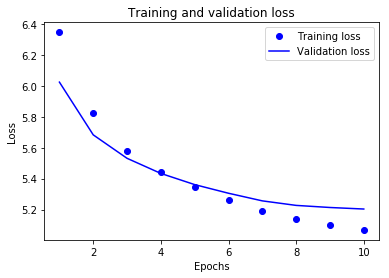

In [129]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

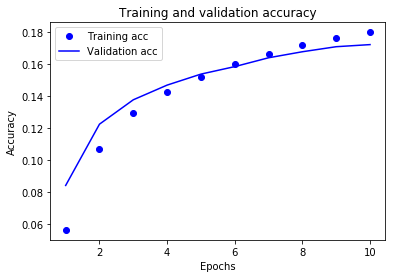

In [130]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [131]:
max(val_acc)

0.1722722418834096

The accuracy is about 17.23%. <br/>
Next we will compare it with the 130,000 words in the directory.

In [13]:
tk1 = Tokenizer(num_words = 130000, lower = True)
gen_txt=train_text_five.str.lower()
tk1.fit_on_texts(gen_txt)
generate1 = tk1.texts_to_sequences(gen_txt)

In [14]:
word_index1 = tk1.word_index

In [15]:
# Length of extracted character sequences
maxlen1 = 60

# We sample a new sequence every `step` characters
step1 =1

# This holds our extracted sequences
words1 = []

# This holds the targets (the follow-up characters)
next_word1 = []
for n in range(10000):
    if(len(generate1[n])>maxlen1):
        
        for i in range(0, len(generate1[n]) - maxlen1, step1):
            words1.append(generate1[n][i: i + maxlen1])
            next_word1.append(generate1[n][i + maxlen1])
print('Number of sequences:', len(next_word1))

Number of sequences: 266937


In [17]:
X_gen1 = pad_sequences(words1, maxlen = maxlen1)

In [18]:
y1 = np.zeros((len(words1), len(word_index1)), dtype=np.bool)
for i, sentence in enumerate(words1):
    y1[i, next_word1[i]] = 1

Another rough way to split the data into training data and validation data.

In [16]:
266937*0.8

213549.6

In [19]:
X_gen_train1=X_gen1[0:213550]
Y_gen_train1=y1[0:213550]
X_gen_valid1=X_gen1[213550:]
Y_gen_valid1=y1[213550:]

In [20]:
X_gen_train1.shape

(213550, 60)

In [21]:
Y_gen_train1.shape

(213550, 101892)

Fit the model.

In [24]:
model = Sequential()
model.add(Embedding(130000,128))
model.add(layers.LSTM(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(101892, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train1,Y_gen_train1,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid1, Y_gen_valid1))

Train on 213550 samples, validate on 53387 samples
Epoch 1/10
213550/213550 [==============================] - 1182s 6ms/step - loss: 6.9278 - categorical_accuracy: 0.0412 - val_loss: 6.6616 - val_categorical_accuracy: 0.0516
Epoch 2/10
213550/213550 [==============================] - 1191s 6ms/step - loss: 6.4476 - categorical_accuracy: 0.0655 - val_loss: 6.3770 - val_categorical_accuracy: 0.0809
Epoch 3/10
213550/213550 [==============================] - 1166s 5ms/step - loss: 6.1695 - categorical_accuracy: 0.0984 - val_loss: 6.1812 - val_categorical_accuracy: 0.1062
Epoch 4/10
213550/213550 [==============================] - 1159s 5ms/step - loss: 5.9830 - categorical_accuracy: 0.1174 - val_loss: 6.0661 - val_categorical_accuracy: 0.1160
Epoch 5/10
213550/213550 [==============================] - 1154s 5ms/step - loss: 5.8513 - categorical_accuracy: 0.1271 - val_loss: 5.9886 - val_categorical_accuracy: 0.1208
Epoch 6/10
213550/213550 [==============================] - 1170s 5ms/step

Plot the trend of loss and accuracy.

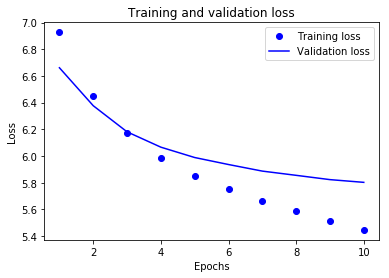

In [25]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

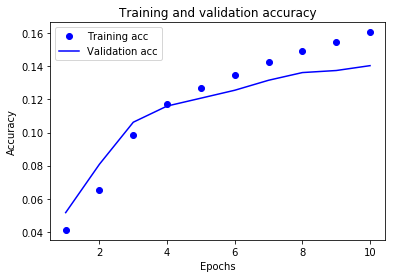

In [26]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
max(val_acc)

0.14038998258365734

Because we want to do comparison， we have to control variable. What we list below is the variables we change. The same principle in the following part.

<table>
    <tr>
        <td>Process Data</td>
        <td>Model structure</td>
        <td>Accuracy</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>1 Layer: LSTM</td>
        <td>17.23%</td>
    </tr>
    <tr>
        <td>(213550, 60,128)</td>
        <td>1 Layer: LSTM</td>
        <td>14.04%</td>
    </tr>
</table>

### Using 10000 words as Dictionary to transfer texts into sequences

Now we want to compare the model with different structures. First, it is one layer model, then two layers, three layers. Next is the one layer of GRU instead of LSTM.

In [25]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.GRU(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 283s 692us/step - loss: 6.2087 - categorical_accuracy: 0.0739 - val_loss: 5.8090 - val_categorical_accuracy: 0.1122
Epoch 2/10
408280/408280 [==============================] - 293s 717us/step - loss: 5.6733 - categorical_accuracy: 0.1229 - val_loss: 5.5922 - val_categorical_accuracy: 0.1329
Epoch 3/10
408280/408280 [==============================] - 283s 694us/step - loss: 5.4960 - categorical_accuracy: 0.1389 - val_loss: 5.4660 - val_categorical_accuracy: 0.1457
Epoch 4/10
408280/408280 [==============================] - 275s 673us/step - loss: 5.3812 - categorical_accuracy: 0.1504 - val_loss: 5.3869 - val_categorical_accuracy: 0.1554
Epoch 5/10
408280/408280 [==============================] - 278s 682us/step - loss: 5.2961 - categorical_accuracy: 0.1584 - val_loss: 5.3265 - val_categorical_accuracy: 0.1600
Epoch 6/10
408280/408280 [==============================] - 276s 676

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 10000)             1290000   
Total params: 2,668,688
Trainable params: 2,668,688
Non-trainable params: 0
_________________________________________________________________


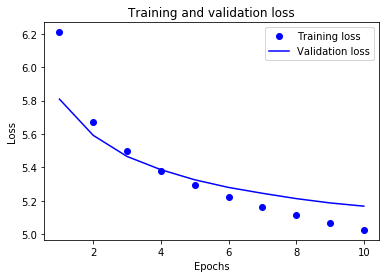

In [27]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

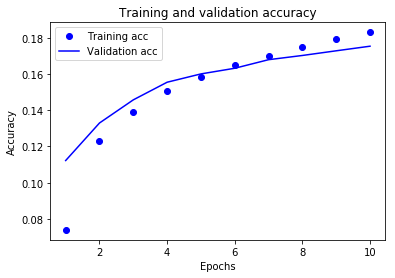

In [28]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
max(val_acc)

0.17530934349312807

The GRU does better than LSTM.

<table>
    <tr>
        <td>Process Data</td>
        <td>Model structure</td>
        <td>Accuracy</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>1 Layer: LSTM</td>
        <td>17.23%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>1 Layer: GRU</td>
        <td>17.53%</td>
    </tr>
</table>

### Model Structure

In this part, we will focus on the model structure. Let's see how the accuracy and fitting time will change. Now we are trying to use two layers model.

First it is the GRU and convolution layer.

In [30]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.GRU(128,return_sequences=True,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 386s 945us/step - loss: 6.5648 - categorical_accuracy: 0.0395 - val_loss: 6.5034 - val_categorical_accuracy: 0.0395
Epoch 2/10
408280/408280 [==============================] - 401s 981us/step - loss: 6.4683 - categorical_accuracy: 0.0407 - val_loss: 6.4891 - val_categorical_accuracy: 0.0416
Epoch 3/10
408280/408280 [==============================] - 401s 983us/step - loss: 6.4188 - categorical_accuracy: 0.0426 - val_loss: 6.4543 - val_categorical_accuracy: 0.0413
Epoch 4/10
408280/408280 [==============================] - 432s 1ms/step - loss: 6.3795 - categorical_accuracy: 0.0432 - val_loss: 6.4282 - val_categorical_accuracy: 0.0425
Epoch 5/10
408280/408280 [==============================] - 344s 842us/step - loss: 6.3467 - categorical_accuracy: 0.0442 - val_loss: 6.4353 - val_categorical_accuracy: 0.0441
Epoch 6/10
408280/408280 [==============================] - 346s 847us

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
gru_2 (GRU)                  (None, None, 128)         98688     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10000)             1290000   
Total params: 2,750,736
Trainable params: 2,750,736
Non-trainable params: 0
_________________________________________________________________


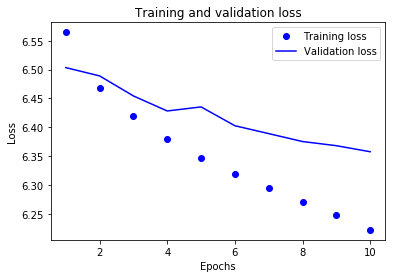

In [32]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

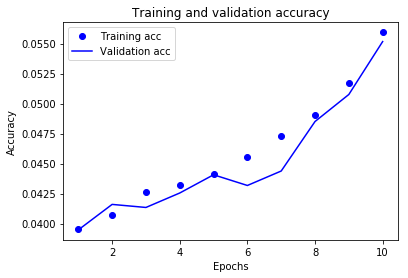

In [33]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
max(val_acc)

0.055167481460736294

When adding convolution layer, the accuracy become much lower.

We change it to be two GRU layers.

In [25]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.GRU(128,return_sequences=True,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.GRU(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 371s 908us/step - loss: 6.2613 - categorical_accuracy: 0.0657 - val_loss: 5.8793 - val_categorical_accuracy: 0.1058
Epoch 2/10
408280/408280 [==============================] - 369s 903us/step - loss: 5.7268 - categorical_accuracy: 0.1170 - val_loss: 5.6322 - val_categorical_accuracy: 0.1261
Epoch 3/10
408280/408280 [==============================] - 367s 899us/step - loss: 5.5309 - categorical_accuracy: 0.1335 - val_loss: 5.5003 - val_categorical_accuracy: 0.1405
Epoch 4/10
408280/408280 [==============================] - 368s 901us/step - loss: 5.4107 - categorical_accuracy: 0.1443 - val_loss: 5.4137 - val_categorical_accuracy: 0.1477
Epoch 5/10
408280/408280 [==============================] - 366s 896us/step - loss: 5.3236 - categorical_accuracy: 0.1525 - val_loss: 5.3534 - val_categorical_accuracy: 0.1531
Epoch 6/10
408280/408280 [==============================] - 361s 883

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
gru_1 (GRU)                  (None, None, 128)         98688     
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 10000)             1290000   
Total params: 2,767,376
Trainable params: 2,767,376
Non-trainable params: 0
_________________________________________________________________


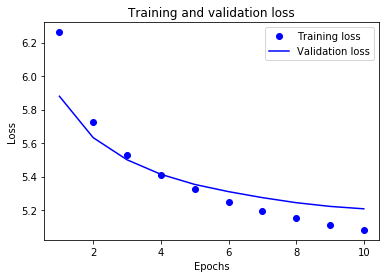

In [27]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

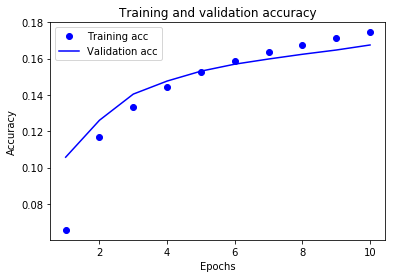

In [28]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
max(val_acc)

0.16751085028741833

We change it to be two LSTM layers.

In [30]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.LSTM(128,return_sequences=True,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.LSTM(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 416s 1ms/step - loss: 6.3726 - categorical_accuracy: 0.0497 - val_loss: 6.0597 - val_categorical_accuracy: 0.0726
Epoch 2/10
408280/408280 [==============================] - 417s 1ms/step - loss: 5.9057 - categorical_accuracy: 0.0920 - val_loss: 5.7723 - val_categorical_accuracy: 0.1100
Epoch 3/10
408280/408280 [==============================] - 417s 1ms/step - loss: 5.6781 - categorical_accuracy: 0.1168 - val_loss: 5.6107 - val_categorical_accuracy: 0.1233
Epoch 4/10
408280/408280 [==============================] - 420s 1ms/step - loss: 5.5344 - categorical_accuracy: 0.1273 - val_loss: 5.5068 - val_categorical_accuracy: 0.1325
Epoch 5/10
408280/408280 [==============================] - 425s 1ms/step - loss: 5.4435 - categorical_accuracy: 0.1361 - val_loss: 5.4505 - val_categorical_accuracy: 0.1388
Epoch 6/10
408280/408280 [==============================] - 423s 1ms/step - lo

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 10000)             1290000   
Total params: 2,833,168
Trainable params: 2,833,168
Non-trainable params: 0
_________________________________________________________________


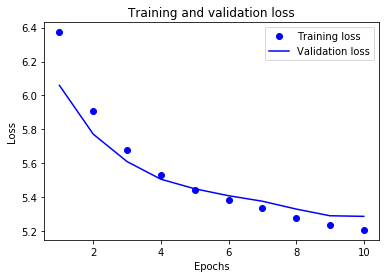

In [32]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

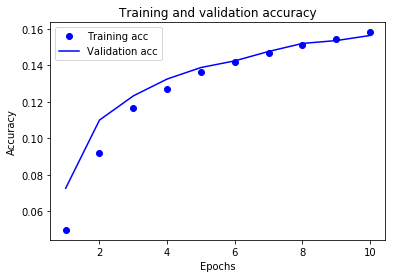

In [33]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
max(val_acc)

0.1564205308094691

Let's mix GRU and LSTM together.

In [35]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.GRU(128,return_sequences=True,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.LSTM(128,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 397s 972us/step - loss: 6.3196 - categorical_accuracy: 0.0573 - val_loss: 5.9783 - val_categorical_accuracy: 0.0861
Epoch 2/10
408280/408280 [==============================] - 395s 967us/step - loss: 5.8181 - categorical_accuracy: 0.1050 - val_loss: 5.6956 - val_categorical_accuracy: 0.1180
Epoch 3/10
408280/408280 [==============================] - 398s 974us/step - loss: 5.6103 - categorical_accuracy: 0.1239 - val_loss: 5.5642 - val_categorical_accuracy: 0.1303
Epoch 4/10
408280/408280 [==============================] - 395s 967us/step - loss: 5.4918 - categorical_accuracy: 0.1353 - val_loss: 5.4718 - val_categorical_accuracy: 0.1387
Epoch 5/10
408280/408280 [==============================] - 397s 972us/step - loss: 5.4074 - categorical_accuracy: 0.1427 - val_loss: 5.4133 - val_categorical_accuracy: 0.1445
Epoch 6/10
408280/408280 [==============================] - 395s 967

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
gru_3 (GRU)                  (None, None, 128)         98688     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 10000)             1290000   
Total params: 2,800,272
Trainable params: 2,800,272
Non-trainable params: 0
_________________________________________________________________


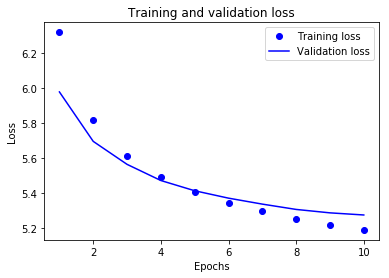

In [37]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

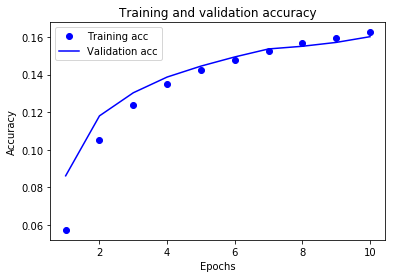

In [38]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
max(val_acc)

0.16020221219643863

Generally speaking, the accuracies of two layers are lower than one layer.

<table>
    <tr>
        <td>Process Data</td>
        <td>Model structure</td>
        <td>Accuracy</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU, Second Layer: convolution layer</td>
        <td>5.52%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU, Second Layer: GRU</td>
        <td>16.75%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: LSTM, Second Layer: LSTM</td>
        <td>15.64%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU, Second Layer: LSTM</td>
        <td>16.02%</td>
    </tr>
</table>

Now the model is two GRU layers, but we will change the parameter of the second layer.

In [43]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.GRU(128,return_sequences=True,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.GRU(256,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 533s 1ms/step - loss: 6.1671 - categorical_accuracy: 0.0741 - val_loss: 5.7696 - val_categorical_accuracy: 0.1125
Epoch 2/10
408280/408280 [==============================] - 530s 1ms/step - loss: 5.6371 - categorical_accuracy: 0.1241 - val_loss: 5.5421 - val_categorical_accuracy: 0.1339
Epoch 3/10
408280/408280 [==============================] - 538s 1ms/step - loss: 5.4414 - categorical_accuracy: 0.1409 - val_loss: 5.4079 - val_categorical_accuracy: 0.1458
Epoch 4/10
408280/408280 [==============================] - 534s 1ms/step - loss: 5.3114 - categorical_accuracy: 0.1526 - val_loss: 5.3170 - val_categorical_accuracy: 0.1567
Epoch 5/10
408280/408280 [==============================] - 538s 1ms/step - loss: 5.2138 - categorical_accuracy: 0.1611 - val_loss: 5.2628 - val_categorical_accuracy: 0.1607
Epoch 6/10
408280/408280 [==============================] - 541s 1ms/step - lo

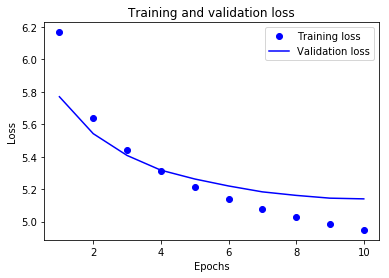

In [44]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

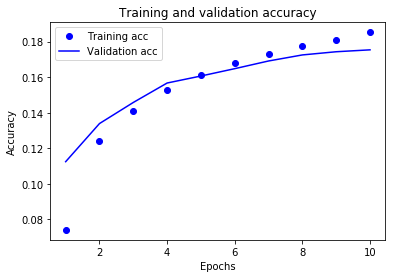

In [45]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
max(val_acc)

0.17536812609968386

Let's move to the three layers of GRU. The parameter of each layer will be 128, 256, 512.

In [47]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.GRU(128,return_sequences=True,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.GRU(256,return_sequences=True,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.GRU(512,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 1486s 4ms/step - loss: 6.1376 - categorical_accuracy: 0.0796 - val_loss: 5.7230 - val_categorical_accuracy: 0.1187
Epoch 2/10
408280/408280 [==============================] - 1483s 4ms/step - loss: 5.5814 - categorical_accuracy: 0.1303 - val_loss: 5.4759 - val_categorical_accuracy: 0.1414
Epoch 3/10
408280/408280 [==============================] - 1485s 4ms/step - loss: 5.3662 - categorical_accuracy: 0.1483 - val_loss: 5.3445 - val_categorical_accuracy: 0.1522
Epoch 4/10
408280/408280 [==============================] - 1481s 4ms/step - loss: 5.2263 - categorical_accuracy: 0.1578 - val_loss: 5.2852 - val_categorical_accuracy: 0.1595
Epoch 5/10
408280/408280 [==============================] - 1485s 4ms/step - loss: 5.1211 - categorical_accuracy: 0.1659 - val_loss: 5.2194 - val_categorical_accuracy: 0.1656
Epoch 6/10
408280/408280 [==============================] - 1487s 4ms/ste

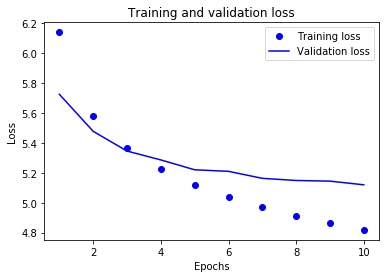

In [48]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

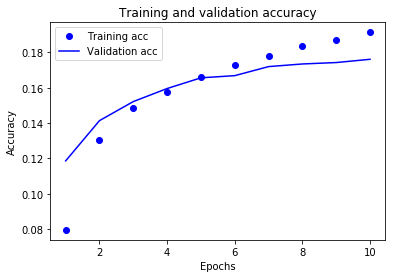

In [49]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [50]:
max(val_acc)

0.17605392324643704

Because the best model until now is the last one, the parameter of first layer is all 128. We move back to the first layer and check whether the different parameters of first layer will have better effect. Then we text 256 first.

In [28]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.GRU(256,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 446s 1ms/step - loss: 6.0981 - categorical_accuracy: 0.0859 - val_loss: 5.7110 - val_categorical_accuracy: 0.1214
Epoch 2/10
408280/408280 [==============================] - 432s 1ms/step - loss: 5.5872 - categorical_accuracy: 0.1312 - val_loss: 5.4959 - val_categorical_accuracy: 0.1421
Epoch 3/10
408280/408280 [==============================] - 432s 1ms/step - loss: 5.4087 - categorical_accuracy: 0.1472 - val_loss: 5.3829 - val_categorical_accuracy: 0.1534
Epoch 4/10
408280/408280 [==============================] - 427s 1ms/step - loss: 5.2858 - categorical_accuracy: 0.1588 - val_loss: 5.2931 - val_categorical_accuracy: 0.1615
Epoch 5/10
408280/408280 [==============================] - 427s 1ms/step - loss: 5.1860 - categorical_accuracy: 0.1680 - val_loss: 5.2354 - val_categorical_accuracy: 0.1681
Epoch 6/10
408280/408280 [==============================] - 440s 1ms/step - lo

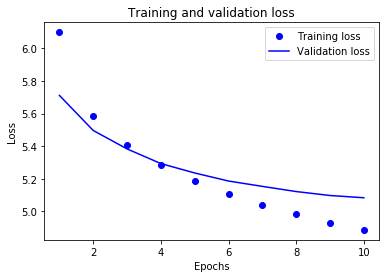

In [29]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

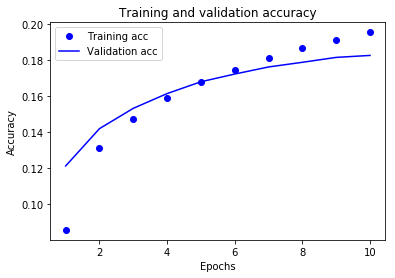

In [30]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
max(val_acc)

0.1827061555216792

We can find the accuracy become higher. We test 512 to check whether the accuracy will become higher.

In [32]:
model = Sequential()
model.add(Embedding(10000,128))
model.add(layers.GRU(512,
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(Dense(10000, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])
history = model.fit(X_gen_train,Y_gen_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_gen_valid, Y_gen_valid))

Train on 408280 samples, validate on 102071 samples
Epoch 1/10
408280/408280 [==============================] - 1027s 3ms/step - loss: 6.0279 - categorical_accuracy: 0.0948 - val_loss: 5.6532 - val_categorical_accuracy: 0.1259
Epoch 2/10
408280/408280 [==============================] - 1025s 3ms/step - loss: 5.5378 - categorical_accuracy: 0.1371 - val_loss: 5.4650 - val_categorical_accuracy: 0.1477
Epoch 3/10
408280/408280 [==============================] - 1033s 3ms/step - loss: 5.3516 - categorical_accuracy: 0.1545 - val_loss: 5.3247 - val_categorical_accuracy: 0.1607
Epoch 4/10
408280/408280 [==============================] - 1058s 3ms/step - loss: 5.2148 - categorical_accuracy: 0.1672 - val_loss: 5.2508 - val_categorical_accuracy: 0.1678
Epoch 5/10
408280/408280 [==============================] - 1032s 3ms/step - loss: 5.1089 - categorical_accuracy: 0.1767 - val_loss: 5.1746 - val_categorical_accuracy: 0.1735
Epoch 6/10
408280/408280 [==============================] - 1028s 3ms/ste

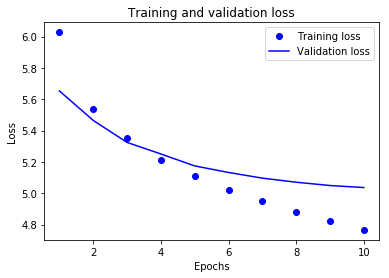

In [33]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

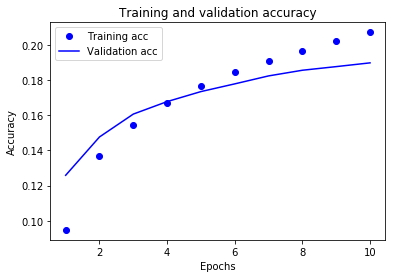

In [34]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
max(val_acc)

0.18988743131037708

Wow. It is the highest accuracy since now which is about 18.99%.

<table>
    <tr>
        <td>Process Data</td>
        <td>Model structure</td>
        <td>Accuracy</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(128), Second Layer: GRU(256)</td>
        <td>17.54%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(128), Second Layer: GRU(256), Third Layer: GRU(512)</td>
        <td>17.61%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(256)</td>
        <td>18.27%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(512)</td>
        <td>18.99%</td>
    </tr>
</table>

We will use the last model to generate some sentence to check whether the sentence is readable.

In [38]:
start_index = random.randint(0, len(words))
generated_text = X_gen[start_index]
tx=" "
tx2=" "
for i in generated_text:
    tx=tx+list(word_index.keys())[list(word_index.values()).index(i)]+" "
    tx2=tx2+list(word_index.keys())[list(word_index.values()).index(i)]+" "

Let's input two sentences and we will generate 50 words under different temperature.

In [39]:
tx

' an iced tea with a of fresh mint too cold to try that now but once the snow melts i '

In [40]:
tx2

' an iced tea with a of fresh mint too cold to try that now but once the snow melts i '

In [47]:
txs=[] 
for temperature in [0.2, 0.5, 1.0, 1.2]:
    tx=tx2
    generated_text = X_gen[start_index]
    for i in range(50):
        preds = model.predict(generated_text)[0]
        index=sample(preds,temperature)
        tx=tx+list(word_index.keys())[list(word_index.values()).index(index)]+" "
        generated_text[0:-2]=generated_text[1:-1]
        generated_text[-1]=index
    txs.append(tx)

In [48]:
txs[0]

' an iced tea with a of fresh mint too cold to try that now but once the snow melts i excellent tea and this lot the and flavor much tea be them is the i you taste br in with in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in '

In [49]:
txs[1]

' an iced tea with a of fresh mint too cold to try that now but once the snow melts i in in great in in in to in in in with in in in in in in to to to in in over i for on in in in in to in in in and by for in in in in in in in to in in in in in '

In [50]:
txs[2]

' an iced tea with a of fresh mint too cold to try that now but once the snow melts i month tough into in you used in less nothing having prunes and flour in impact sweet to 1 to yummy anymore on over an pre including gums my best two sauce therefore handle dense always snacks fresh your available with salad eater at meals forward has carbonation that a into '

In [51]:
txs[3]

" an iced tea with a of fresh mint too cold to try that now but once the snow melts i blooming light makes for in cereal out i to pills certainly spicy or electrolytes very soup smelled when stuffing in down clogging area back nor green into yourself vet lots now cannot flour awful since even up usually not bite mccann's can perfectly indeed chunks like drinking an tea far "

In [61]:
generated_text =X_gen[1]
tx=" "
tx2=" "
for i in generated_text:
    tx=tx+list(word_index.keys())[list(word_index.values()).index(i)]+" "
    tx2=tx2+list(word_index.keys())[list(word_index.values()).index(i)]+" "

In [62]:
tx

' have bought several of the vitality canned dog food products and have found them all to be of good quality '

In [64]:
txs=[] 
for temperature in [0.2, 0.5, 1.0, 1.2]:
    tx=tx2
    generated_text = X_gen[1]
    for i in range(50):
        preds = model.predict(generated_text)[0]
        index=sample(preds,temperature)
        tx=tx+list(word_index.keys())[list(word_index.values()).index(index)]+" "
        generated_text[0:-2]=generated_text[1:-1]
        generated_text[-1]=index
    txs.append(tx)

In [65]:
txs[0]

' have bought several of the vitality canned dog food products and have found them all to be of good quality been a times the best i food food and br the a in in of make sure the stuff stuff for value stuff stuff food stuff stuff stuff food food food quality price stuff stuff food food stuff stuff stuff stuff quality stuff stuff food stuff stuff stuff food stuff '

In [66]:
txs[1]

' have bought several of the vitality canned dog food products and have found them all to be of good quality price health organic snack flavor food job stuff food website product stuff about quality stuff stuff for flavor food health mix flavor food deal health texture flavor value stuff product food food these flavor stuff stuff food sauce for food product food stuff cup food product cup stuff value food '

In [67]:
txs[2]

" have bought several of the vitality canned dog food products and have found them all to be of good quality deal reviews california maple for but pour quality sour whole course bodied jr exception cup source here's no drive fortunately fiber sell i thanks with for maybe definitely flavors source treat where potato experience remember mix flavor now product deal for oven recipe with quality price mush dish company instant "

In [68]:
txs[3]

" have bought several of the vitality canned dog food products and have found them all to be of good quality place type value there's quality because ingredients half strong classically am sustain cup portion thing candy creamy lips smell flavor item decided gum freshness salad for moved texture people eats standard dry couldn't balance end memories lose broth and minutes anyone earths chocolate use chili health result sore treat all "

It still seems hard to read. The result is not good. However, in personal opinion, the sentence generate under the temperature 1 is the best, so I will use temperature =1 to generate more sentences. 

In [69]:
origin=[]
generated=[]
for n in range(5):
    start_index = random.randint(0, len(words))
    generated_text = X_gen[start_index]
    tx=" "
    tx2=" "
    for i in generated_text:
        tx=tx+list(word_index.keys())[list(word_index.values()).index(i)]+" "
        tx2=tx2+list(word_index.keys())[list(word_index.values()).index(i)]+" "
    origin.append(tx2)
    generated_text = X_gen[1]
    for i in range(50):
        preds = model.predict(generated_text)[0]
        index=sample(preds,temperature)
        tx=tx+list(word_index.keys())[list(word_index.values()).index(index)]+" "
        generated_text[0:-2]=generated_text[1:-1]
        generated_text[-1]=index
    generated.append(tx)

In [80]:
for n in range(5):
    print("Input:\n "+origin[n]+"\n\nOutput:\n"+generated[n]+"\n\n")

Input:
  he can keep up his energy keep his weight up and recover more quickly from bumps from running the field 

Output:
 he can keep up his energy keep his weight up and recover more quickly from bumps from running the field individually creamy 30 same coffee is sauces deal to quality excellent flavor thing extra least counter indulgence ever blends half snacks quality food the syrup food combination deep recipe deal medium banana compares size start suitcase without gluten calcium crashing lamb stuff paper after once absolutely red boy affect cup 


Input:
  nutrition but also because they seem to be more filling this is now my favorite if you purchase the fiber 

Output:
 nutrition but also because they seem to be more filling this is now my favorite if you purchase the fiber my coffees pepper artificial paying course dark wonderful hips at seems cookies avid disappointed blueberry stand condition locally offering snacks mainly take coats ended enjoy big work half myself reviews b

The result is not good. We do some researches on it, other sentences generated by text generator are also not good. So we should do more researches and experiments to create better sentences in the future.

## Results:

Text Classfication:
<table>
    <tr>
        <td>Algorithm</td>
        <td>Accuracy</td>
        <td>Hyperparameters</td>
    </tr>
     <tr>
        <td>Logistic Regression</td>
        <td>79.92%</td>
        <td></td>
    </tr>
    <tr>
        <td>XGBoost Classifier</td>
        <td>81.33%</td>
        <td>max_depth=8, n_estimators=350</td>
    </tr>
    <tr>
        <td>Random Forest Classifier</td>
        <td>83.89%</td>
        <td>'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200</td>
    </tr>
    <tr>
        <td>RNN(Recurrent Neural Network)</td>
        <td>84.34%</td>
        <td>optimizer='rmsprop', loss='binary_crossentropy', activation='sigmoid', one layer: GRU</td>
    </tr>
</table>

We can see in the table that the accuracy of RNN is the highest in text classification.

Sentence Generator:<br/>
<table>
    <tr>
        <td>Process Data</td>
        <td>Model structure</td>
        <td>Accuracy</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(128), Second Layer: convolution layer(128)</td>
        <td>5.52%</td>
    </tr>
     <tr>
        <td>(213550, 60,128)</td>
        <td>First Layer: LSTM(128)</td>
        <td>14.04%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: LSTM(128), Second Layer: LSTM(128)</td>
        <td>15.64%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(128), Second Layer: LSTM(128)</td>
        <td>16.02%</td>
    </tr>
     <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(128), Second Layer: GRU(128)</td>
        <td>16.75%</td>
    </tr>
     <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: LSTM(128)</td>
        <td>17.23%</td>
    </tr>
     <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(128)</td>
        <td>17.53%</td>
    </tr>
     <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(128), Second Layer: GRU(256)</td>
        <td>17.54%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(128), Second Layer: GRU(256), Third Layer: GRU(512)</td>
        <td>17.61%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(256)</td>
        <td>18.27%</td>
    </tr>
    <tr>
        <td>(408280, 20,128)</td>
        <td>First Layer: GRU(512)</td>
        <td>18.99%</td>
    </tr>
</table>

The best model structure is one GRU layer and its parameter is 512 and its accuracy is 18.99%.

## Conclusions:

Here are several conclusions we get from above:
* RNN(Recurrent Neural Network) really does a good job in text area.
* It is wrong that the more layers, the better the model will be. We think it may be vanishing gradient problem in our model. When the model is three layers(128/256/512), its accuracy will be lower than one layer(512). Because the learning rate of first layer and second layer are low that will have a bad effect on the third layer.
* In machine learning, the vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training.
* The model running time is mainly related to the parameters of the layer with the largest parameter in the model. 
* When we use low creativity, the generated word will be the highest appear frequency in the model. However, when we use the higher creativity, the generated word will be diverse.

## Contributions

Dingting Huang did part A and code comments.<br/>
Yize Wang did part B and researches.

## Citations
The thought of word embeddings is from the following link, but we don't use the code above it.<br/>
https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/6.1-using-word-embeddings.ipynb<br/>

The logistic regression, SVM(support vector machine), Random Forest Classifier, XGBoost Classifier part are adapted from the assignment 1. We use the alomost the same code from assignment 1, but change the input data. The following link is assignment 1:<br/>
https://github.com/nikbearbrown/CSYE_7245/blob/master/Assignments/Assignment_1_Properly_Format_and_Explain.ipynb<br/>

In sentence generator part, the code like the model, the sample function, the generate word code and the thought of temperature are from the following link. We removed some code that we thought was useless and changed a little on the generate word part. The code of processing data are totally different.<br/>
https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/8.1-text-generation-with-lstm.ipynb<br/>

The part we have not mentioned above are written by ourselves. The following are the references:


* Comparison between SVM and Logistic Regression: Which One is Better to Discriminate?
http://www.kurims.kyoto-u.ac.jp/EMIS/journals/RCE/V35/v35n2a03.pdf
* XGBoost: A Scalable Tree Boosting System
https://www.kdd.org/kdd2016/papers/files/rfp0697-chenAemb.pdf
* RANDOM FORESTS
https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf
* Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting
https://papers.nips.cc/paper/5955-convolutional-lstm-network-a-machine-learning-approach-for-precipitation-nowcasting.pdf
* Multi-Dimensional Recurrent Neural Networks
https://arxiv.org/pdf/0705.2011v1.pdf
* TRAINING RECURRENT NEURAL NETWORKS
http://www.cs.utoronto.ca/~ilya/pubs/ilya_sutskever_phd_thesis.pdf
* LightRNN: Memory and Computation-Efficient Recurrent Neural Networks https://papers.nips.cc/paper/6512-lightrnn-memory-and-computation-efficient-recurrent-neural-networks.pdf
* Illustrated Guide to LSTM’s and GRU’s: A step by step explanation
https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
* Text generation with LSTM
https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/8.1-text-generation-with-lstm.ipynb
* Vanishing gradient problem
https://en.wikipedia.org/wiki/Vanishing_gradient_problem

## License

Copyright <2019> Dingting Huang and Yize Wang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

THE WORK (AS DEFINED BELOW) IS PROVIDED UNDER THE TERMS OF THIS CREATIVE COMMONS PUBLIC LICENSE ("CCPL" OR "LICENSE"). THE WORK IS PROTECTED BY COPYRIGHT AND/OR OTHER APPLICABLE LAW. ANY USE OF THE WORK OTHER THAN AS AUTHORIZED UNDER THIS LICENSE OR COPYRIGHT LAW IS PROHIBITED.

BY EXERCISING ANY RIGHTS TO THE WORK PROVIDED HERE, YOU ACCEPT AND AGREE TO BE BOUND BY THE TERMS OF THIS LICENSE. TO THE EXTENT THIS LICENSE MAY BE CONSIDERED TO BE A CONTRACT, THE LICENSOR GRANTS YOU THE RIGHTS CONTAINED HERE IN CONSIDERATION OF YOUR ACCEPTANCE OF SUCH TERMS AND CONDITIONS.